In [41]:
from array import array
import math

In [42]:
xr = array('d')
yr = array('d')
xt = array('d')
yt = array('d')
xe = array('d')
ye = array('d')
xk = array('d')
yk = array('d')
xp = array('d')
yp = array('d')

Read data from the files and store in the above python arrays.

In [43]:
nf = 0
with open('rplot.txt') as f:
    for line in f:
        nf=nf+1
        data = line.split()
        xr.append(float(data[0]))
        yr.append(float(data[1]))
ng = 0
with open('tplot.txt') as g:
    for line in g:
        ng=ng+1
        data = line.split()
        xt.append(float(data[0]))
        yt.append(float(data[1]))
nd = 0
with open('total.txt') as d:
    for line in d:
        nd=nd+1
        data = line.split()
        xe.append(float(data[0]))
        ye.append(float(data[1]))
nh = 0
with open('kinetic.txt') as h:
    for line in h:
        nh=nh+1
        data = line.split()
        xk.append(float(data[0]))
        yk.append(float(data[1]))
ne = 0
with open('potential.txt') as e:
    for line in e:
        ne=ne+1
        data = line.split()
        xp.append(float(data[0]))
        yp.append(float(data[1]))


/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_24235/1147003140.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(111, projection='polar')
/var/folders/jg/3shqt61x201b290vj1j83q5r0000gq/T/ipykernel_24235/1147003140.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(121)


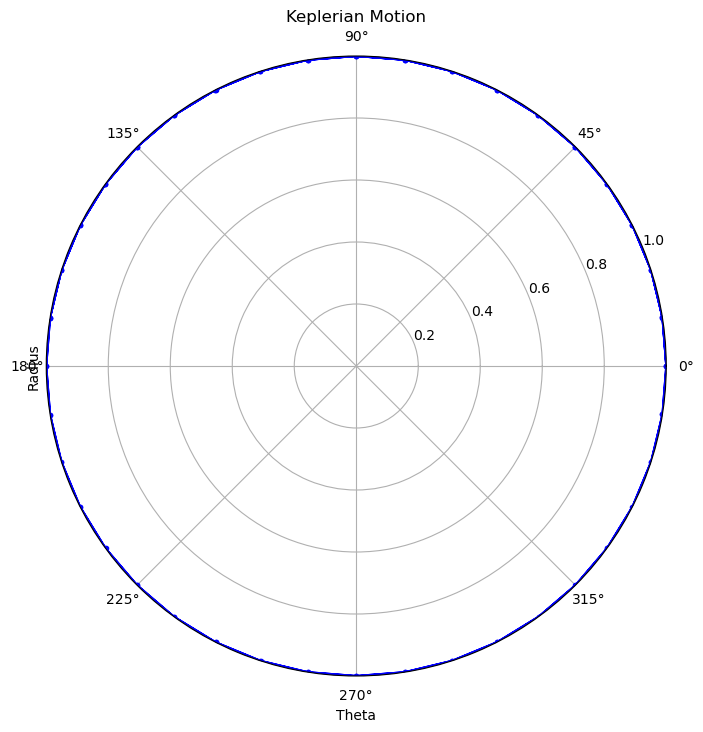

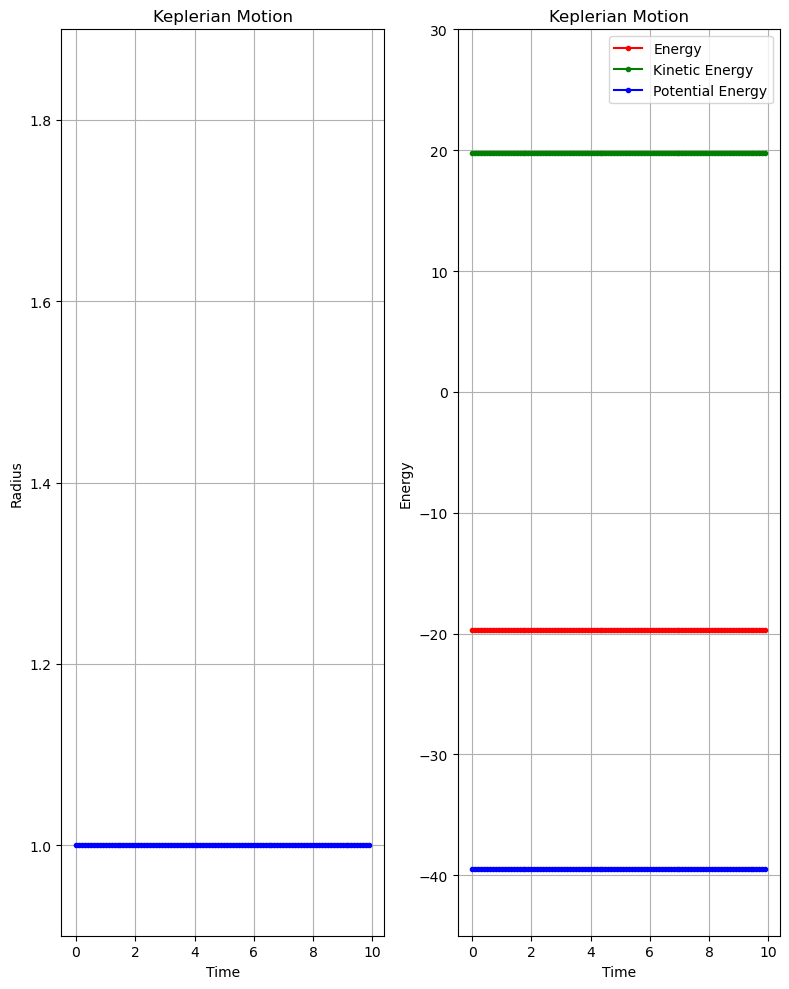

In [44]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.subplots(figsize=(8, 10))
ax1 = plt.subplot(111, projection='polar')

# Keplerian Motion - Theta vs. Radius
ax1.plot(xr, yr, marker='.', linestyle='-', color='blue')
ax1.set_title('Keplerian Motion')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Radius')
#ax1.set_xlim(0, 1.1*np.pi)
#ax1.set_ylim(0.9, 1.6)
ax1.grid(True)

fig2 = plt.subplots(figsize=(8, 10))
ax2 = plt.subplot(121)
ax3 = plt.subplot(122)

# Keplerian Motion - Time vs. Radius
ax2.plot(xt, yt, marker='.', linestyle='-', color='blue')
ax2.set_title('Keplerian Motion')
ax2.set_xlabel('Time')
ax2.set_ylabel('Radius')
ax2.set_ylim(0.9, 1.9)
ax2.grid(True)

# Keplerian Motion - Time vs. Energy
ax3.plot(xe, ye, marker='.', linestyle='-', color='red', label='Energy')
ax3.plot(xk, yk, marker='.', linestyle='-', color='green', label='Kinetic Energy')
ax3.plot(xp, yp, marker='.', linestyle='-', color='blue', label='Potential Energy')
ax3.set_title('Keplerian Motion')
ax3.set_xlabel('Time')
ax3.set_ylabel('Energy')
ax3.set_ylim(-45, 30)
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()
